In [1]:
import pandas as pd

In [2]:
raw_documents = []
snippets = []
data = pd.read_csv('7545332.csv')
for text in data.tweet.values:
    #print (text)
    raw_documents.append( text )
    snippets.append( text[0:min(len(text),100)] )
print("Read %d raw text documents" % len(raw_documents))

Read 10491 raw text documents


In [3]:
custom_stop_words = []
with open( "stopwords.txt", "r" ) as fin:
    for line in fin.readlines():
        custom_stop_words.append( line.strip() )
# note that we need to make it hashable
print("Stopword list has %d entries" % len(custom_stop_words) )

Stopword list has 353 entries


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
# use a custom stopwords list, set the minimum term-document frequency to 20
vectorizer = CountVectorizer(stop_words = custom_stop_words, min_df = 20)
A = vectorizer.fit_transform(raw_documents)
print( "Created %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


Created 10491 X 781 document-term matrix


In [5]:
terms = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 781 distinct terms


In [6]:

import joblib
joblib.dump((A,terms,snippets), "articles-raw.pkl")

['articles-raw.pkl']

In [7]:
import re
class TokenGenerator:
    def __init__( self, documents, stopwords ):
        self.documents = documents
        self.stopwords = stopwords
        self.tokenizer = re.compile( r"(?u)\b\w\w+\b" )

    def __iter__( self ):
        print("Building Word2Vec model ...")
        for doc in self.documents:
            tokens = []
            for tok in self.tokenizer.findall( doc ):
                if tok in self.stopwords:
                    tokens.append( "<stopword>" )
                elif len(tok) >= 2:
                    tokens.append( tok )
            yield tokens

In [8]:
import gensim
docgen = TokenGenerator( raw_documents, custom_stop_words )
# the model has 500 dimensions, the minimum document-term frequency is 20
w2v_model = gensim.models.Word2Vec(docgen, vector_size=500, min_count=20, sg=1)

/srv/conda/envs/notebook/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...


In [9]:
print( "Model has %d terms" % len(w2v_model.wv.key_to_index) )

Model has 881 terms


In [10]:
w2v_model.save("w2v-model.bin")

In [11]:
kmin, kmax = 1, 40

In [12]:
from sklearn import decomposition
topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    model = decomposition.NMF( init="nndsvd", n_components=k ) 
    W = model.fit_transform( A )
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

Applying NMF for k=1 ...
Applying NMF for k=2 ...
Applying NMF for k=3 ...
Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...
Applying NMF for k=11 ...
Applying NMF for k=12 ...
Applying NMF for k=13 ...
Applying NMF for k=14 ...
Applying NMF for k=15 ...
Applying NMF for k=16 ...
Applying NMF for k=17 ...
Applying NMF for k=18 ...
Applying NMF for k=19 ...
Applying NMF for k=20 ...
Applying NMF for k=21 ...
Applying NMF for k=22 ...
Applying NMF for k=23 ...
Applying NMF for k=24 ...
Applying NMF for k=25 ...
Applying NMF for k=26 ...
Applying NMF for k=27 ...
Applying NMF for k=28 ...
Applying NMF for k=29 ...
Applying NMF for k=30 ...
Applying NMF for k=31 ...
Applying NMF for k=32 ...
Applying NMF for k=33 ...
Applying NMF for k=34 ...
Applying NMF for k=35 ...
Applying NMF for k=36 ...
Applying NMF for k=37 ...
Applying NMF for k=38 ...
Applying NMF for k=39

In [15]:
raw_documents = []
data = pd.read_csv('7545332.csv')
for text in data.tweet.values:
    raw_documents.append( text.lower()  )
print("Read %d raw text documents" % len(raw_documents))

Read 10491 raw text documents


In [18]:

custom_stop_words = []
with open( "stopwords.txt", "r" ) as fin:
    for line in fin.readlines():
        custom_stop_words.append( line.strip().lower() )
# note that we need to make it hashable
print("Stopword list has %d entries" % len(custom_stop_words) )

Stopword list has 353 entries


In [19]:

import re
class TokenGenerator:
    def __init__( self, documents, stopwords ):
        self.documents = documents
        self.stopwords = stopwords
        self.tokenizer = re.compile( r"(?u)\b\w\w+\b" )

    def __iter__( self ):
        print("Building Word2Vec model ...")
        for doc in self.documents:
            tokens = []
            for tok in self.tokenizer.findall( doc ):
                if tok in self.stopwords:
                    tokens.append( "<stopword>" )
                elif len(tok) >= 2:
                    tokens.append( tok )
            yield tokens

In [20]:
import gensim
docgen = TokenGenerator( raw_documents, custom_stop_words )
# the model has 500 dimensions, the minimum document-term frequency is 20
w2v_model = gensim.models.Word2Vec(docgen, vector_size=500, min_count=20, sg=1)

Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...


In [21]:
print( "Model has %d terms" % len(w2v_model.wv.key_to_index) )

Model has 801 terms


In [22]:
w2v_model.save("w2v-model.bin")

In [23]:
def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            pair_scores.append( w2v_model.wv.similarity(pair[0], pair[1]) )
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

In [24]:
import numpy as np
def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( all_terms[term_index] )
    return top_terms

In [25]:
from itertools import combinations
k_values = []
coherences = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( terms, H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values.append( k )
    coherences.append( calculate_coherence( w2v_model, term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )

K=01: Coherence=0.6251
K=02: Coherence=0.5553
K=03: Coherence=0.5587
K=04: Coherence=0.6298
K=05: Coherence=0.6367
K=06: Coherence=0.6464
K=07: Coherence=0.6279
K=08: Coherence=0.6524
K=09: Coherence=0.6528
K=10: Coherence=0.6419
K=11: Coherence=0.6778
K=12: Coherence=0.6806
K=13: Coherence=0.6983
K=14: Coherence=0.7084
K=15: Coherence=0.7133
K=16: Coherence=0.7112
K=17: Coherence=0.7204
K=18: Coherence=0.7243
K=19: Coherence=0.7236
K=20: Coherence=0.7299
K=21: Coherence=0.7293
K=22: Coherence=0.7318
K=23: Coherence=0.7363
K=24: Coherence=0.7376
K=25: Coherence=0.7460
K=26: Coherence=0.7407
K=27: Coherence=0.7349
K=28: Coherence=0.7428
K=29: Coherence=0.7485
K=30: Coherence=0.7405
K=31: Coherence=0.7521
K=32: Coherence=0.7517
K=33: Coherence=0.7570
K=34: Coherence=0.7555
K=35: Coherence=0.7599
K=36: Coherence=0.7566
K=37: Coherence=0.7607
K=38: Coherence=0.7631
K=39: Coherence=0.7639
K=40: Coherence=0.7679


In [26]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

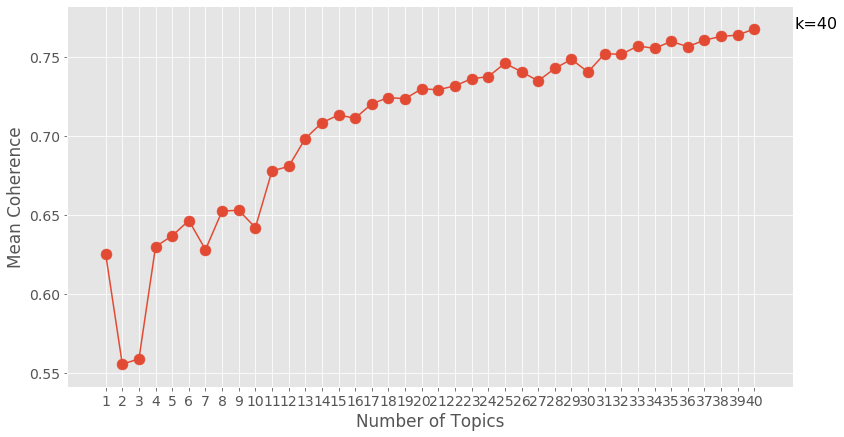

In [27]:

fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter( k_values, coherences, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

In [28]:
k = best_k
# get the model that we generated earlier.
W = topic_models[k-kmin][1]
H = topic_models[k-kmin][2]

In [30]:
for topic_index in range(k):
    descriptor = get_descriptor( terms, H, topic_index, 10 )
    str_descriptor = ", ".join( descriptor )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: art, blog, painting, gallery, draw365, piece, faces, weekend, call, cool
Topic 02: ennyman, territory, bit, ly, thots, newest, poem, update, email, comments
Topic 03: duluthart, dai, opening, tweed, gallery, paintings, reception, images, friday, event
Topic 04: published, medium, observations, wilde, poem, article, marketing, saturdaythoughts, version, history
Topic 05: thanks, photo, making, available, unsplash, freely, post, poem, cool, medium
Topic 06: dylan, bob, fest, song, album, songs, fans, themed, salute, days
Topic 07: faces, picture, ennyman, blog, man, ink, draw365, site, red, titled
Topic 08: posted, titled, called, painting, thots, newly, bit, piece, ly, part
Topic 09: ed, newman, blogspot, face, faces, newest, painting, portrait, draw365, added
Topic 10: blog, post, entry, wrote, posts, titled, asked, interesting, little, watching
Topic 11: pubchat, write, stories, writer, think, work, something, get, way, know
Topic 12: amwriting, mondaymotivation, history, st

In [31]:
def get_top_snippets( all_snippets, W, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( W[:,topic_index] )[::-1]
    # now get the snippets corresponding to the top-ranked indices
    top_snippets = []
    for doc_index in top_indices[0:top]:
        top_snippets.append( all_snippets[doc_index] )
    return top_snippets

In [34]:
topic_snippets = get_top_snippets( snippets, W, 0, 20 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

01. #art  Cool website to see more art online... http://www.invesp.com/blog-rank/Art   links to countles
02. #DuluthArt #DLH @ArtonthePlanet Frustrated because you can't got to art classes? Art on the Planet h
03. Just posted an array of new photos I took at Lizzard's #Art Gallery here in #Duluth . Need something
04. #art posted now at Many Faces art blog, an invite to Red Interactive, the collaborative art experien
05. #art  Do art agents make a difference? Literary agents have a role. Any suggestions/opinions on Art 
06. #art Does art have to be a visual experience? Blog entry today, Scratch &amp; Sniff: Art That Smells
07. #art just posted at my Many Faces art blog, Man in Red, Black and Blue. Ink on paper, art for sale  
08. #AmWriting #Art Creativity on display -- Tour the world's great art museums virtually. We're all tem
09. #art  just posted, picture of the day at my art blog called Feelin' Groovy. It's a foto of "found ar
10. #art  posted this  a.m. at Many Faces art blog, Bat

In [35]:
topic_snippets = get_top_snippets( snippets, W, 1, 20 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

01. Just posted at Ennyman's Territory, another Wordless Wednesday. always uniquely ennyman.  http://pio
02. #ART Start with Art. Red Interactive open house invitation is posted at Ennyman's Territory. bit.ly/
03. Just posted at Ennyman's Territory, thots on The Letter N,   and an invite to my live painting event
04. #Oscars  just posted  warm up thots about Oscar Sunday....  at Ennyman's Territory  http://bit.ly/f0
05. Just posted at Ennyman's Territory, thots about T Anderson's Den of Lions as it relates to the hiker
06. #poetry  Just posted at Ennyman's Territory, a few musings about poetry including The Algebra of Mys
07. just posted at Ennyman's Territory  What Will It Look Like Tomorrow? (a few thots about our unwritte
08. Just posted, A Postmodern Perspective on Moby Dick by guest blogger RJB at Ennyman's Territory... th
09. Just posted at Ennyman's Territory: Shel Silverstein's poem  recorded  by Bobby Bare, The Winner, a 
10. just posted at Ennyman's Territory, It Was Only Roc